# Rally de Datos GTO
## _Semana 5_: Educación

In [ ]:
# Se importan las librerías para el análisis de datos
import pandas as pd
import numpy as np

# Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

# Para hacer lectura de archivos json
from urllib.request import urlopen
import json

# Para usar el algoritmo de clustering de k-means
from sklearn.cluster import KMeans

# Se define la paleta de colores de Dataket 8)
colors = ["#264653", "#2a9d8f", "#e9C46a", "#F4A261", "#E76F51"]

## Lectura de Datasets

In [ ]:
# Se define el url donde se encuentra el archivo (en el repositorio de Github)
url_inversion = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana5/Inversion_1T_Qs_por_municipio.csv"

# Se lee el archivo
df_inversion = pd.read_csv(url_inversion)

# Se convierten los strings del monto a float
df_inversion["Monto"] = df_inversion["Monto"].str.replace(",", "").astype(float)

In [ ]:
# El dataset que conecta ODS con Pps
url_pp = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana5/alineacion_pp_ods.csv"

df_pp = pd.read_csv(url_pp, encoding="latin") # El encoding se escoje para que lea las letras con acento

In [ ]:
# El dataset que conecta ODS con PEDs
url_ped = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana5/alineacion_ped_ods.csv"

df_ped = pd.read_csv(url_ped, encoding="latin") # El encoding se escoje para que lea las letras con acento

In [ ]:
# El dataset propio de la ubicación y población de los municipios de Guanajuato
url_gto = "https://raw.githubusercontent.com/GOLF-fisica/Dataket/main/Semana5/gto_poblacion_ubicacion.csv"

df_gto = pd.read_csv(url_gto)

In [ ]:
# El dataset propio de la ubicación y población de los municipios de Guanajuato
url_escuela = "https://raw.githubusercontent.com/GOLF-fisica/Dataket/main/Semana5/gto_matricula_analfabetismo.csv"

df_escuela = pd.read_csv(url_escuela)

## Alineación de los Pp's al ODS 4

In [ ]:
# Los Pp's asociados al ODS 4
df_pp_ods_4 = df_pp[df_pp["id_ods"]==4]
pp_ods_4 = df_pp_ods_4["id_programa_presupuestario"].unique()

In [ ]:
# Los Pp's e el ODS 4
pp_ods_4

array(['E038', 'P005', 'E057', 'E017', 'E010', 'E003', 'E061', 'E024',
       'E018', 'E067', 'E008', 'E047', 'E066', 'P004', 'E028', 'E035',
       'E068', 'E062', 'E040', 'E005'], dtype=object)

In [ ]:
# Número de Pp's con el ODS 4
len(pp_ods_4)

20

In [ ]:
# Para una lectura sencilla del dataset del ODS 4
df_pp_ods_4

,id_eje,descripcion_eje,id_programa_presupuestario,descripcion_programa_presupuestario,id_componente,descripcion_componente,id_siglas,descripcion_siglas,id_ods,descripcion_ods,id_meta,descripcion_meta,id_tema_general,descripcion_tema_general,id_tema_objetivo,descripcion_tema_objetivo,id_meta_rubro_propuesta,descripcion_meta_rubro_propuesta
0,3,Educación de Calidad,E038,Competencias para el trabajo,E038.C36,A. IEMS (Instituciones de educación Media Supe...,SEG,Secretaría de Educación,4,Objetivo 4: Garantizar una educación inclusiva...,4.4,4.4 Aumentar el número de jóvenes y adultos qu...,1,Educación,1.1,Educación,1.1.1,Educación
1,3,Educación de Calidad,E038,Competencias para el trabajo,E038.C92,A. IES (Instituciones de educación Superior) c...,SEG,Secretaría de Educación,4,Objetivo 4: Garantizar una educación inclusiva...,4.4,4.4 Aumentar el número de jóvenes y adultos qu...,1,Educación,1.1,Educación,1.1.1,Educación
2,3,Educación de Calidad,P005,Gestión de centros escolares de Educación Medi...,P005.C29,A. Procesos de planeación y evaluación institu...,SEG,Secretaría de Educación,4,Objetivo 4: Garantizar una educación inclusiva...,4.3,4.3 Asegurar el acceso en condiciones de igual...,1,Educación,1.1,Educación,1.1.1,Educación
11,3,Educación de Calidad,E057,"Trayectoria en Nivel Básico, Media Superior y ...",E057.C21,A. Registro de la trayectoria escolar de los a...,SEG,Secretaría de Educación,4,Objetivo 4: Garantizar una educación inclusiva...,4.1,4.1 Asegurar que todas las niñas y todos los n...,1,Educación,1.1,Educación,1.1.1,Educación
12,3,Educación de Calidad,E017,Cobertura de Educación Media Superior y Superior,E017.C20,A. Servicios educativos incrementados en el ni...,SEG,Secretaría de Educación,4,Objetivo 4: Garantizar una educación inclusiva...,4.3,4.3 Asegurar el acceso en condiciones de igual...,1,Educación,1.1,Educación,1.1.1,Educación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,7,Poderes y Autónomos,E068,Vinculación del estudiante con los sectores ec...,E068.C01,Servicios y apoyos para la internacionalizació...,UG,Universidad de Guanajuato,4,Objetivo 4: Garantizar una educación inclusiva...,4.b,"4.b Para 2020, aumentar a nivel mundial el núm...",1,Educación,1.1,Educación,1.1.1,Educación
557,7,Poderes y Autónomos,E067,Trayectoria Académica Consolidada,E067.C03,Servicios y promoción de actividades deportiva...,UG,Universidad de Guanajuato,4,Objetivo 4: Garantizar una educación inclusiva...,4.7,4.7 Garantizar que todos los estudiantes adqui...,1,Educación,1.1,Educación,1.1.1,Educación
567,3,Educación de Calidad,E003,Actividades artísticas y culturales,E003.C05,Talentos artísticos formados y promovidos,IEC,Instituto Estatal de la Cultura,4,Objetivo 4: Garantizar una educación inclusiva...,4.7,4.7 Garantizar que todos los estudiantes adqui...,1,Educación,1.1,Educación,1.1.1,Educación
568,3,Educación de Calidad,E003,Actividades artísticas y culturales,E003.C07,"Talleres de educación artística no formal, exp...",IEC,Instituto Estatal de la Cultura,4,Objetivo 4: Garantizar una educación inclusiva...,4.7,4.7 Garantizar que todos los estudiantes adqui...,1,Educación,1.1,Educación,1.1.1,Educación


In [ ]:
df_pp_ods_4[df_pp_ods_4["id_siglas"]=="INAEBA"]

,id_eje,descripcion_eje,id_programa_presupuestario,descripcion_programa_presupuestario,id_componente,descripcion_componente,id_siglas,descripcion_siglas,id_ods,descripcion_ods,id_meta,descripcion_meta,id_tema_general,descripcion_tema_general,id_tema_objetivo,descripcion_tema_objetivo,id_meta_rubro_propuesta,descripcion_meta_rubro_propuesta
247,3,Educación de Calidad,E024,Alianza a favor de la educación para adultos,E024.C04,Certificados y constancias emitidos a la pobla...,INAEBA,Instituto de Alfabetización y Educación Básica...,4,Objetivo 4: Garantizar una educación inclusiva...,4.5,4.5 Eliminar las disparidades de género en la ...,1,Educación,1.1,Educación,1.1.1,Educación
494,3,Educación de Calidad,E024,Alianza a favor de la educación para adultos,E024.C03,"Programas de educación para niñas, niños, jóve...",INAEBA,Instituto de Alfabetización y Educación Básica...,4,Objetivo 4: Garantizar una educación inclusiva...,4.5,4.5 Eliminar las disparidades de género en la ...,1,Educación,1.1,Educación,1.1.1,Educación
551,3,Educación de Calidad,E024,Alianza a favor de la educación para adultos,E024.C02,Servicios educativos de calidad ofertados para...,INAEBA,Instituto de Alfabetización y Educación Básica...,4,Objetivo 4: Garantizar una educación inclusiva...,4.5,4.5 Eliminar las disparidades de género en la ...,1,Educación,1.1,Educación,1.1.1,Educación


In [ ]:
# Las dependencias asociadas al ODS 4
df_pp_ods_4["id_siglas"].unique()

array(['SEG', 'CECYTEG', 'CONALEP', 'EPRR', 'ITESA', 'ITESG', 'ITESI',
       'ITSPR', 'ITESS', 'ITSUR', 'SABES', 'UPB', 'UPGTO', 'UPJR', 'UPPE',
       'UTL', 'UTLB', 'UTNG', 'UTS', 'UTSMA', 'UTSOE', 'UVEG', 'SDSH',
       'MIQ', 'IEC', 'DIF', 'UG', 'PEPNNA', 'CODE', 'JUVENTUDES GTO',
       'INAEBA', 'SG', 'FORUM', 'INIFEG'], dtype=object)

In [ ]:
# La inversion en ODS 4
df_inversion_ods_4 = df_inversion[df_inversion["id_programa_presupuestario"].isin(pp_ods_4)]

In [ ]:
# Los Pp's asociadas al ODS 4 y a la inversión
df_inversion_ods_4["id_programa_presupuestario"].unique()

array(['E010', 'E018', 'E017', 'E057', 'E040', 'E005', 'E047', 'E008',
       'E062', 'E003', 'E038', 'P005'], dtype=object)

In [ ]:
# Número de proyectos
len(df_inversion_ods_4["id_proceso_proyecto"].unique())

86

In [ ]:
# Se define un dataframe que sirva para armar una bonita gráfica
df_dummy = df_pp_ods_4.copy()

# Se ordenan las filas por monto aprobado y se divide entre un millón y se redondea 
# a dos lugares decimales para que todo quede en formato de millones de pesos
df_dummy["Programas"] = 1

df_dummy["Programas Presupuestarios"] = "Programas presupuestarios 2021 asociados al ODS 4 por Dependencia"

# Se hace el treemap
fig = px.treemap(df_dummy,
                 path=["Programas Presupuestarios", "id_siglas", "id_programa_presupuestario"],
                 values="Programas", color_discrete_sequence=px.colors.sequential.Aggrnyl)

# Se ajusta el tamaño de la letra
fig.update_layout(font_size=13)

# Se guarda el html
plotly.offline.plot(fig, filename='/work/treemap_pp_dependencias_ods_4.html')

# Se muestra la gráfica
fig.show()

In [ ]:
# Se define un dataframe que sirva para armar una bonita gráfica
df_dummy = df_inversion_ods_4.groupby("id_programa_presupuestario",
                                      as_index=False).sum().join(df_pp_ods_4.set_index("id_programa_presupuestario")["id_siglas"],
                                                                 on="id_programa_presupuestario").drop_duplicates()

# Se ordenan las filas por monto aprobado y se divide entre un millón y se redondea 
# a dos lugares decimales para que todo quede en formato de millones de pesos
df_dummy["Programas"] = 1

df_dummy["Programas Presupuestarios"] = "Proyectos de inversión 2021 asociados al ODS 4 por Dependencia y Programa"

# Se hace el treemap
fig = px.treemap(df_dummy,
                 path=["Programas Presupuestarios", "id_siglas", "id_programa_presupuestario"],
                 values="Programas", color_discrete_sequence=px.colors.sequential.Aggrnyl)

# Se ajusta el tamaño de la letra
fig.update_layout(font_size=13)

# Se guarda el html
plotly.offline.plot(fig, filename='/work/treemap_inversion_dependencias_ods_4.html')

# Se muestra la gráfica
fig.show()

In [ ]:
# Un df que se modificará para tener una linda gráfica
df_dummy = df_inversion_ods_4.copy()

# Se añade un directorio base y se coloca el presupuesto en términos de mdp
df_dummy["Programas Presupuestarios"] = "Proyectos de inversión 2021 asociados al ODS 4 por Territorio y Programa"
df_dummy["Presupuesto (mdp)"] = round(df_dummy["Monto"].copy()/1_000_000, 2)

# Se hace el treemap
fig = px.treemap(df_dummy,
                 path=["Programas Presupuestarios", "Municipio", "id_programa_presupuestario"],
                 values="Presupuesto (mdp)", color_discrete_sequence=px.colors.sequential.Aggrnyl)

# Se ajusta el tamaño de la letra
fig.update_layout(font_size=13)

# Se guarda el html
plotly.offline.plot(fig, filename='/work/treemap_inversion_ods_4.html')

# Se muestra la gráfica
fig.show()

El archivo _GEO Json_ de los municipios de Guanajuato usado en el siguiente mapa coroplético fue hecho por Alberto Barradas y subido en Diciembre del 2016 al siguiente [enlace](http://datamx.io/sl/dataset/municipios-de-guanajuato).

In [ ]:
# Se agrupa y prepara el dataset de las inversiones al primer trimestre del 2021
df_dummy = df_inversion_ods_4.copy()
df_choropleth = df_dummy.groupby("Municipio", as_index=False).sum()
df_choropleth["Monto"] = round(df_choropleth["Monto"].copy()/1_000_000, 2)

# Se cambian los nombres de los municipios para que se ajusten a los nombres del geojson
df_choropleth["Municipio"] = df_choropleth["Municipio"].str.replace(" de la Victoria", "")
df_choropleth["Municipio"] = df_choropleth["Municipio"].str.replace("Jérecuaro", "Jerécuaro")

# Se lee el archivo geojson de los municipios de Guanajuato
url_geojson = "http://datamx.io/sl/dataset/01a8a26c-8ce3-4b4c-a20c-033eeeab1669/resource/b1cd35b7-479e-4fa0-86e9-e897d3c617e6/download/gto.geojson"
with urlopen(url_geojson) as response:
    guanajuato = json.load(response)

# Se hace el mapa
fig = px.choropleth(df_choropleth, geojson=guanajuato, locations='Municipio',
                    featureidkey="properties.mun_name",
                    color='Monto',
                    color_continuous_scale="Aggrnyl_r", 
                    range_color=(0, 1.25e2), 
                    labels={'Monto':'Presupuesto (mdp)'}
                    )

# Se centra el mapa en Guanajuato
fig.update_geos(fitbounds="locations", visible=False)

# Se configura el margen
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.update_layout(font_size=15)

plotly.offline.plot(fig, filename='/work/choropleth_ods_4.html')

fig.show()

In [ ]:
# Se corrige el tab de los nombres de los municipios
df_gto["Municipio"] = df_gto["Municipio"].str.replace("\t","")

df_escuela["Municipio"] = df_escuela["Municipio"].str.replace("\t","")

In [ ]:
# Se agrupa y prepara el dataset de las inversiones al primer trimestre del 2021 per capita
df_dummy = df_inversion_ods_4.copy()

# Se agrupa el presupuesto para cada municipio y se le da el formato de millones
# de pesos, por eso se divide entre un millón
df_choropleth = df_dummy.groupby("Municipio", as_index=False).sum()

# Se cambian los nombres de los municipios para que se ajusten a los nombres del geojson
df_choropleth["Municipio"] = df_choropleth["Municipio"].str.replace("Jérecuaro", "Jerécuaro")

# Se hace el cálculo per cápita
df_choropleth_poblacion = df_choropleth.join(df_gto.set_index("Municipio")["Poblacion"], on="Municipio")
df_choropleth_poblacion["Monto per capita"] = round(df_choropleth_poblacion["Monto"].copy()/(df_choropleth_poblacion["Poblacion"].copy()), 2)

# Se cambian los nombres de los municipios para que se ajusten a los nombres del geojson
df_choropleth_poblacion["Municipio"] = df_choropleth_poblacion["Municipio"].str.replace(" de la Victoria", "")

# Se hace el mapa
fig = px.choropleth(df_choropleth_poblacion, geojson=guanajuato, locations='Municipio',
                    featureidkey="properties.mun_name",
                    color='Monto per capita',
                    color_continuous_scale="tempo", 
                    range_color=(0, 700), 
                    labels={'Monto per capita':'Presupuesto per cápita (MXN)'}
                    )

# Se centra el mapa en Guanajuato
fig.update_geos(fitbounds="locations", visible=False)

# Se configura el margen y el tamaño de la letra
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(font_size=15)

# Se guarda el html de la gráfica interactiva
plotly.offline.plot(fig, filename='/work/choropleth_per_capita_ods_4.html')

# Se uestra la gráfica
fig.show()

In [ ]:
# Se agrupa y prepara el dataset de las inversiones al primer trimestre del 2021 per capita
df_dummy = df_inversion_ods_4.copy()

# Se agrupa el presupuesto para cada municipio y se le da el formato de millones
# de pesos, por eso se divide entre un millón
df_choropleth = df_dummy.groupby("Municipio", as_index=False).sum()

# Se cambian los nombres de los municipios para que se ajusten a los nombres del geojson
df_choropleth["Municipio"] = df_choropleth["Municipio"].str.replace("Jérecuaro", "Jerécuaro")

# Se hace el cálculo per cápita
df_choropleth_poblacion = df_choropleth.join(df_escuela.set_index("Municipio")["Matricula"], on="Municipio")
df_choropleth_poblacion["Monto por estudiante"] = round(df_choropleth_poblacion["Monto"].copy()/(df_choropleth_poblacion["Matricula"].copy()), 2)

# Se cambian los nombres de los municipios para que se ajusten a los nombres del geojson
df_choropleth_poblacion["Municipio"] = df_choropleth_poblacion["Municipio"].str.replace(" de la Victoria", "")

# Se hace el mapa
fig = px.choropleth(df_choropleth_poblacion, geojson=guanajuato, locations='Municipio',
                    featureidkey="properties.mun_name",
                    color='Monto por estudiante',
                    color_continuous_scale="tempo", 
                    range_color=(0, 3.2e3), 
                    labels={'Monto por estudiante':'Presupuesto por estudiante (MXN)'}
                    )

# Se centra el mapa en Guanajuato
fig.update_geos(fitbounds="locations", visible=False)

# Se configura el margen y el tamaño de la letra
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(font_size=15)

# Se guarda el html de la gráfica interactiva
plotly.offline.plot(fig, filename='/work/choropleth_por_estudiante_ods_4.html')

# Se uestra la gráfica
fig.show()

## Alineación de los PED's al ODS 4

In [ ]:
# Los Pp's asociados al ODS 4
df_ped_ods_4 = df_ped[df_ped["id_ods"]=="ODS.04"]
ped_ods_4 = df_ped_ods_4["id_dimension_ped"].unique()

In [ ]:
# Los PED's asociados al ODS 4
ped_ods_4

array(['PED.D04', 'PED.D01', 'PED.D02'], dtype=object)

In [ ]:
# La información de los PED's asociados al ODS 4
df_ped_ods_4

,id_dimension_ped,descripcion_dimension_ped,id_linea_estrategica_ped,descripcion_linea_estrategica_ped,id_objetivo_ped,descripcion_objetivo_ped,id_estrategia_ped,descripcion_estrategia_ped,id_ods,descripcion_ods,id_metas_ods,descripción_metas_ods
10,PED.D04,Administración Pública y Estado de Derecho,PED.04.02,Seguridad y Justicia,PED.04.02.02,Incrementar la efectividad del sistema de just...,PED.04.02.02.01,Fortalecimiento de la autonomía de todos los ó...,ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.07,4.7 Garantizar que todos los estudiantes adqui...
11,PED.D04,Administración Pública y Estado de Derecho,PED.04.02,Seguridad y Justicia,PED.04.02.02,Incrementar la efectividad del sistema de just...,PED.04.02.02.02,"Fortalecimiento de la infraestructura, el equi...",ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.07,4.7 Garantizar que todos los estudiantes adqui...
12,PED.D04,Administración Pública y Estado de Derecho,PED.04.02,Seguridad y Justicia,PED.04.02.02,Incrementar la efectividad del sistema de just...,PED.04.02.02.03,Implementación de esquemas de seguimiento y ev...,ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.07,4.7 Garantizar que todos los estudiantes adqui...
13,PED.D04,Administración Pública y Estado de Derecho,PED.04.02,Seguridad y Justicia,PED.04.02.02,Incrementar la efectividad del sistema de just...,PED.04.02.02.04,"Homologación, interconexión y certificación de...",ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.07,4.7 Garantizar que todos los estudiantes adqui...
14,PED.D04,Administración Pública y Estado de Derecho,PED.04.02,Seguridad y Justicia,PED.04.02.02,Incrementar la efectividad del sistema de just...,PED.04.02.02.05,Instauración del servicio civil de carrera con...,ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.07,4.7 Garantizar que todos los estudiantes adqui...
...,...,...,...,...,...,...,...,...,...,...,...,...
516,PED.D01,Humana y Social,PED.01.02,Educación para la Vida,PED.01.02.01,Lograr una cobertura universal en la educación...,PED.01.02.01.05,Fomento del involucramiento de los padres y ma...,ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.0C,4.c Aumentar considerablemente la oferta de ma...
517,PED.D02,Económica,PED.02.01,Empleo y Competitividad,PED.02.01.01,"Promover el empleo de calidad, inclusivo y bie...",PED.02.01.01.01,Formación y fortalecimiento de capital humano ...,ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.0B,"4.b Para 2020, aumentar a nivel mundial el núm..."
518,PED.D02,Económica,PED.02.01,Empleo y Competitividad,PED.02.01.01,"Promover el empleo de calidad, inclusivo y bie...",PED.02.01.01.02,"Promoción del autoempleo, la equidad y la igua...",ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.0B,"4.b Para 2020, aumentar a nivel mundial el núm..."
519,PED.D02,Económica,PED.02.01,Empleo y Competitividad,PED.02.01.01,"Promover el empleo de calidad, inclusivo y bie...",PED.02.01.01.03,Fortalecimiento del sistema de protección soci...,ODS.04,Objetivo 4: Garantizar una educación inclusiva...,MM.04.0B,"4.b Para 2020, aumentar a nivel mundial el núm..."


## Oportunidad y reto para el ODS 4

In [ ]:
# Se agrupa y prepara el dataset de las inversiones al primer trimestre del 2021 per capita

# Se agrupa el presupuesto para cada municipio y se le da el formato de millones
# de pesos, por eso se divide entre un millón
df_ajuste = df_inversion_ods_4.groupby("Municipio", as_index=False).sum()

# Se cambian los nombres de los municipios para que se ajusten a los nombres del geojson
df_ajuste["Municipio"] = df_ajuste["Municipio"].str.replace("Jérecuaro", "Jerécuaro")

# Se hace el cálculo per cápita
df_ajuste_final = df_ajuste.join(df_escuela.set_index("Municipio")[["Matricula","Analfabetismo"]], on="Municipio")
df_ajuste_final = df_ajuste_final.join(df_gto.set_index("Municipio")["Poblacion"], on="Municipio")
df_ajuste_final["Monto (mdp)"] = df_ajuste_final["Monto"]/1_000_000

df_ajuste_final = df_ajuste_final.dropna(axis=0)

In [ ]:
# Se hace una regresión lineal de las matrículas de educación básica en
# el ciclo 2020/2021 en el estado y el dinero de inversión destinado al
# primer trimestre
ajuste = np.polyfit(df_ajuste_final["Matricula"], df_ajuste_final["Monto (mdp)"], deg=1)
recta = np.poly1d(ajuste)

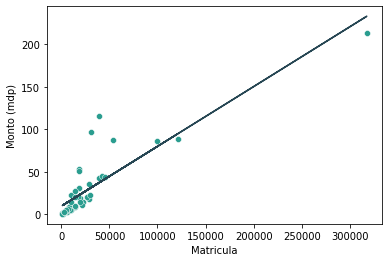

In [ ]:
# Se grafica la recta
fig = sns.scatterplot(x=df_ajuste_final["Matricula"], y=df_ajuste_final["Monto (mdp)"],
                      color=colors[1]);

plt.plot(df_ajuste_final["Matricula"], recta(df_ajuste_final["Matricula"]),
         color=colors[0]);

In [ ]:
# La gráfica anterior pero interactiva 8)

# Se hace el scatterplot
fig = px.scatter(df_ajuste_final, x="Matricula", y="Monto (mdp)",
                 hover_name=df_ajuste_final["Municipio"],
                 color_discrete_sequence=[colors[1]],
                 title="Inversión en el ODS 4 por la matrícula de educación básica",
                 labels={"Matricula": "Matrícula del ciclo 2020/2021 (educación básica)"})

# Se añade la recta del ajuste
fig.add_trace(go.Line(x=df_ajuste_final["Matricula"],
              y=recta(df_ajuste_final["Matricula"]),
              showlegend=False,
              line=dict(color=colors[0], width=3)))

# Se ajusta el tamaño de la letra
fig.update_layout(font_size=15)

# Se guarda el html para poder usarlo en la página web de Dataket 8)
plotly.offline.plot(fig, filename='/work/scatter_matricula.html')

# Se muestra la imagen
fig.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Los componentes del ajuste
ajuste

array([7.02881540e-04, 9.65277321e+00])

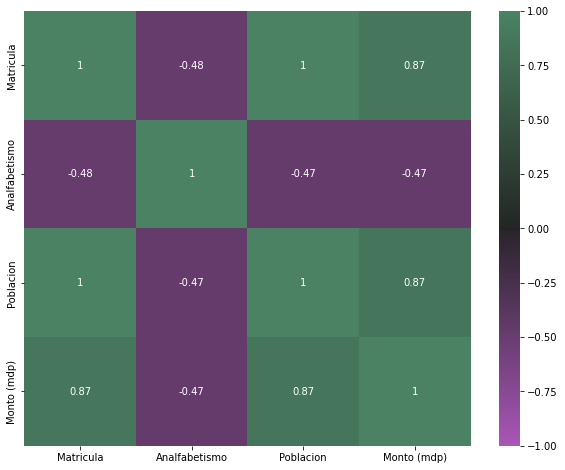

In [ ]:
# Se calcula la correlación de todas las variables interesantes

# Se define el tamaño de la figura
plt.figure(figsize=(10,8))

# Se hace el heatmap
sns.heatmap(df_ajuste_final.drop(["ciclo", "id_eje", "Monto"], axis=1).corr(),
            vmin=-1, vmax=1, annot=True,
            cmap=sns.diverging_palette(300, 145, s=60, center="dark", as_cmap=True));

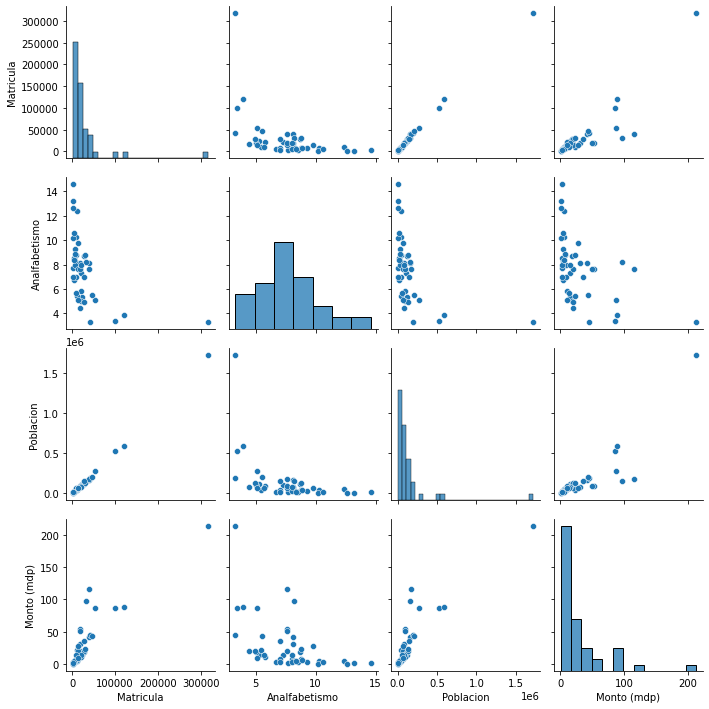

In [ ]:
# Se hace un pairplot para ver la relación de las variables del dataset
sns.pairplot(df_ajuste_final.drop(["ciclo", "id_eje", "Monto"], axis=1));

In [ ]:
# En el pairplot se puede ver que la matrícula y el analfabetismo siguen
# una relación que parece exponencial

# Para confirmar eso, se calcula el logaritmo de las matriculas
df_ajuste_final["logMatricula"] = np.log(df_ajuste_final["Matricula"])

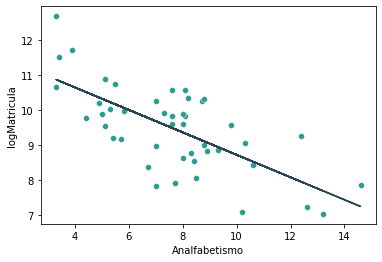

In [ ]:
# Se hace el ajuste del logaritmo de la matrícula y la tasa de analfabetismo
ajuste_2 = np.polyfit(df_ajuste_final["Analfabetismo"], df_ajuste_final["logMatricula"], deg=1)
recta_2 = np.poly1d(ajuste_2)

sns.scatterplot(y=df_ajuste_final["logMatricula"], x=df_ajuste_final["Analfabetismo"],
                color=colors[1]);

plt.plot(df_ajuste_final["Analfabetismo"], recta_2(df_ajuste_final["Analfabetismo"]),
         color=colors[0]);

In [ ]:
# La gráfica anterior pero interactiva B)
fig = px.scatter(df_ajuste_final, x="Analfabetismo", y="logMatricula",
                 hover_name=df_ajuste_final["Municipio"],
                 color_discrete_sequence=[colors[1]],
                 title="La matrícula de educación básica y la tasa de analfabetismo",
                 labels={"logMatricula": "Logaritmo de la Matrícula",
                         "Analfabetismo": "Tasa de Analfabetismo (%)"})

fig.add_trace(go.Line(x=df_ajuste_final["Analfabetismo"],
              y=recta_2(df_ajuste_final["Analfabetismo"]),
              showlegend=False,
              line=dict(color=colors[0], width=3)))

fig.update_layout(font_size=15)

plotly.offline.plot(fig, filename='/work/scatter_logmatricula.html')

fig.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Los coeficientes del ajuste. El primer componente del array corresponde a la pendiente
# de la recta, el segundo corresponde a la ordenada en el origen de la recta.
ajuste_2

array([-0.3194392 , 11.91975179])

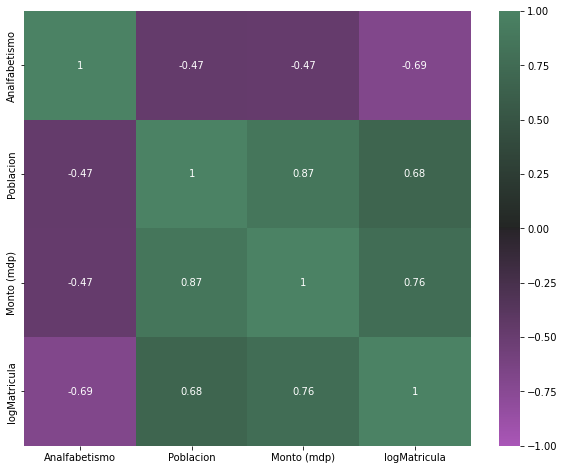

In [ ]:
# La correlación entre variables pero ahora con el logaritmo de la matrícula
plt.figure(figsize=(10,8))

sns.heatmap(df_ajuste_final.drop(["ciclo", "id_eje", "Monto", "Matricula"], axis=1).corr(),
            vmin=-1, vmax=1, annot=True,
            cmap=sns.diverging_palette(300, 145, s=60, center="dark", as_cmap=True));

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f2e9f3c0-13c9-4e25-81b6-4814e7ef3fbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>